# __Clustering Tweets by Hashtags__

## Data

In [1]:
import pandas as pd

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1814599, 4)

In [3]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida]
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida]
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"


In [4]:
def list_2_lower(l: list):
    return [s.lower() for s in l]

In [5]:
tweets_df['hashtags_lowercase'] = tweets_df['hashtags'].map(lambda x: list_2_lower(x))
tweets_df['hashtags_string'] = tweets_df['hashtags_lowercase'].map(lambda x: ' '.join(x))
tweets_df.head()

,author,user_description,tweet,hashtags,hashtags_lowercase,hashtags_string
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida],[bolsonarogenocida],bolsonarogenocida
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida],[bolsonarogenocida],bolsonarogenocida
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...","[bolsonarogenocida, lulasociodogenocida, ciroa...",bolsonarogenocida lulasociodogenocida ciroavisou
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...","[bolsonarogenocida, lulasociodogenocida, ciroa...",bolsonarogenocida lulasociodogenocida ciroavisou
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]","[cpidacovid, genocidadesgracado]",cpidacovid genocidadesgracado


## Clustering: TF-IDF + KMeans

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
vec = TfidfVectorizer()
vec.fit(tweets_df['hashtags_string'])
features = vec.transform(tweets_df['hashtags_string'])
features.shape

(1814599, 74368)

In [8]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(features)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9
Clustering K =  10


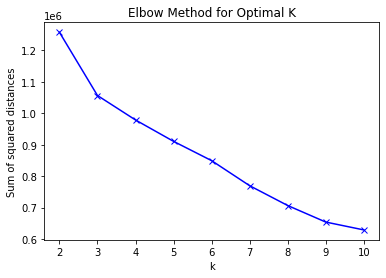

In [9]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 1076739 (59.34%)
Cluster 1: 456160 (25.14%)
Cluster 2: 281700 (15.52%)


In [11]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['tweet'], 'hashtags':tweets_df['hashtags_lowercase'], 'hashtag_str': tweets_df['hashtags_string'],'cluster':labels})

In [12]:
result.query('cluster == 0').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
198327,DanielFreman,@CarlaZambelli38 @renancalheiros Entãopra eu e...,"[renanvagabundo, renancalheirosnacadeia]",renanvagabundo renancalheirosnacadeia,0
538748,katarinavieira,A B12 da Nise deve estar rasteira pq ela não l...,"[cpidacovid19, niseyamaguchiday]",cpidacovid19 niseyamaguchiday,0
827000,tonyoliveira00,"@MarcosRogerio O senhor está certo, o Brasil e...",[cpidapandemia],cpidapandemia,0
245030,Heliuss1,@profpaulamarisa É isso mesmo... #RenanVagabun...,"[renanvagabundo, lulaladraodenovededos]",renanvagabundo lulaladraodenovededos,0
1344527,achagadot,"Hoje, no dia que se completa três meses da mor...","[vacinasim, vivaaosus, forabolsonaro]",vacinasim vivaaosus forabolsonaro,0
1142447,lacradafail2,O Vanpirão Ñ cansa de passar vergonha 🤣\n\nAq...,[cpidocirco],cpidocirco,0
1397714,FiHildete,A maior baixaria rolando na CPI. Ricardo Barro...,[cpidacovid19],cpidacovid19,0
641079,ArtusCristiana,Moça 😂😂😂#CPIdaPandemia,[cpidapandemia],cpidapandemia,0
525686,OPandamaria5,@ONU_derechos #Brazil pede #Sos @Jairbolsonar...,"[brazil, sos, forabolsonaro, impeachment]",brazil sos forabolsonaro impeachment,0
650684,malphurian,Essa obsessão do Girão com essa empresa da mac...,"[cpidacovid, cpidogenocidio, forabolsonaro, fo...",cpidacovid cpidogenocidio forabolsonaro forage...,0


In [13]:
result.query('cluster == 1').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
642662,joaodomenech,Olha a mentira ai! Marcos Rogério é um mentiro...,[cpidacovid],cpidacovid,1
1394944,AnarcoFino,#CPIdaCovid clima bom na CPI.,[cpidacovid],cpidacovid,1
895847,llaflavia,@Sen_Alessandro falou agora o nome do deputado...,"[cpidapandemia, cpidacovid]",cpidapandemia cpidacovid,1
305500,flaviagasi,Adoro quando o Rogério (íntima) coloca as prov...,[cpidacovid],cpidacovid,1
634596,jk_belchior,"O Queiroga tá chorando? Gente, haja pressão pr...",[cpidacovid],cpidacovid,1
1228709,bidepressivo13,"Meu deus, depois de mais de meio milhão de mor...",[cpidacovid],cpidacovid,1
312579,4ndrsU,A Nova Furacão da CPI #CPIdaCovid https://t.co...,[cpidacovid],cpidacovid,1
870509,GSaravi,se continuar assim esse depoimento vai ter que...,[cpidacovid],cpidacovid,1
1450318,tiagocanhota86,"@SenadorHeinze, tu ganha quanto, pra pagar ess...",[cpidacovid],cpidacovid,1
1674606,UOLNoticias,#CPIdaCovid\n\nBruna Morato relatou várias vez...,[cpidacovid],cpidacovid,1


In [14]:
result.query('cluster == 2').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
1512720,MiltonFlavio12,Nossa melhor resposta seria um panelaço ensurd...,[forabolsonaro],forabolsonaro,2
4930,Jeffedomingues2,Isso é um presidoente mesmo \n#ForaBolsonaro h...,[forabolsonaro],forabolsonaro,2
917214,giuliananunez,Bom dia @ArthurLira_ o momento oportuno chegou...,"[cpidacovid, forabolsonaro]",cpidacovid forabolsonaro,2
697462,janine_jks,Esse é um vídeo que brasileiros deviam assisti...,[forabolsonaro],forabolsonaro,2
506232,Clark_ASR,@mairamedeiros Mulé tava agoniado esperando um...,[forabolsonaro],forabolsonaro,2
1275984,tabatamoser,Hahahaha sensacional demais! #ForaBolsonaro ht...,[forabolsonaro],forabolsonaro,2
100326,flaviocpinheiro,@CarlosBolsonaro A família de corruptos psicop...,[forabolsonaro],forabolsonaro,2
1616767,quilombolasilva,"@MarceloFreixo Viva. E, #ForaBolsonaro",[forabolsonaro],forabolsonaro,2
1794694,stormtrooperson,@FlavioBolsonaro apareceu na CPI para defender...,[forabolsonaro],forabolsonaro,2
1785399,Rose_Bak_Bas,"Livrai-nos do mal, amém! \n#forabolsonaro http...",[forabolsonaro],forabolsonaro,2


Cluster :  0


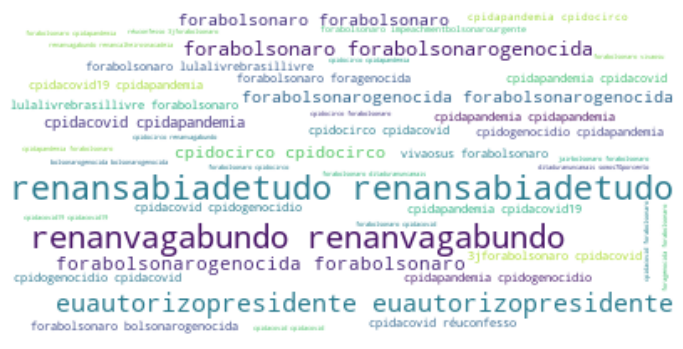

Cluster :  1


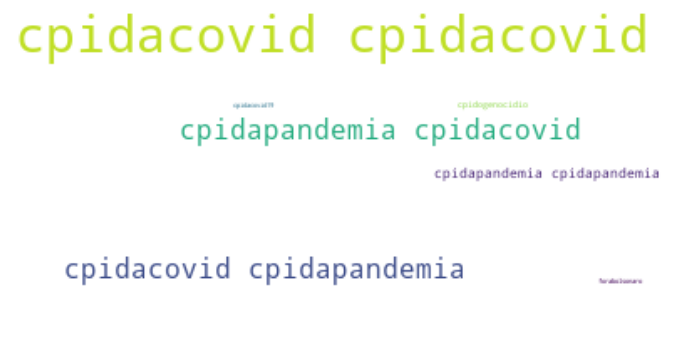

Cluster :  2


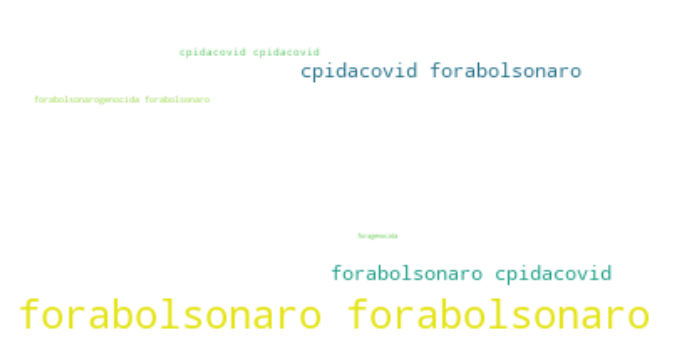

In [15]:
from wordcloud import WordCloud

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['hashtag_str'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [16]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:20]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:20]
    print(f'\nCluster {x} top 20 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.3f}%)')


Cluster 0 top 20 hashtags:

#forabolsonaro: 306265 (12.341%)
#forabolsonarogenocida: 149986 (6.044%)
#cpidacovid: 144902 (5.839%)
#renanvagabundo: 115318 (4.647%)
#cpidapandemia: 113547 (4.575%)
#cpidocirco: 111291 (4.485%)
#renansabiadetudo: 87883 (3.541%)
#euautorizopresidente: 78396 (3.159%)
#bolsonarogenocida: 56972 (2.296%)
#cpidogenocidio: 50257 (2.025%)
#covid19: 42896 (1.729%)
#cpidacovid19: 40921 (1.649%)
#vivaosus: 26142 (1.053%)
#impeachmentbolsonarourgente: 23125 (0.932%)
#29mforabolsonaro: 18819 (0.758%)
#foragenocida: 17926 (0.722%)
#3jforabolsonaro: 15319 (0.617%)
#lulalivrebrasillivre: 14296 (0.576%)
#bolsonaronacadeia: 12831 (0.517%)
#cpidavergonha: 12602 (0.508%)

Cluster 1 top 20 hashtags:

#cpidacovid: 456983 (94.005%)
#cpidapandemia: 28970 (5.959%)
#cpidogenocidio: 51 (0.010%)
#cpidacovid19: 23 (0.005%)
#forabolsonaro: 20 (0.004%)
#cpidocirco: 9 (0.002%)
#forabolsonarogenocida: 9 (0.002%)
#senadocontracovid19: 7 (0.001%)
#cpidavergonha: 7 (0.001%)
#bolsonarogenoci

## Agglomerative Clustering

In [17]:
del result

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [19]:
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
    AgglomerativeClustering(linkage='average')  # Use average linkage
)

In [20]:
pipeline = pipeline.fit(tweets_df['hashtags_string'])

MemoryError: Unable to allocate 1005. GiB for an array with shape (1814599, 74325) and data type float64